/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Epoch 1/10
32/32 [==============================] - 12s 262ms/step - loss: 1.6109 - accuracy: 0.1890
Epoch 2/10
32/32 [==============================] - 8s 261ms/step - loss: 1.6078 - accuracy: 0.2180
Epoch 3/10
32/32 [==============================] - 9s 272ms/step - loss: 1.6078 - accuracy: 0.2120
Epoch 4/10
32/32 [==============================] - 9s 272ms/step - loss: 1.6075 - accuracy: 0.2180
Epoch 5/10
32/32 [==============================] - 8s 264ms/step - loss: 1.6091 - accuracy: 0.2200
Epoch 6/10
32/32 [==============================] - 8s 261ms/step - loss: 1.6081 - accuracy: 0.2000
Epoch 7/10
32/32 [==============================] - 9s 272ms/step - loss: 1.6068 - accuracy: 0.2190
Epoch 8/10
32/32 [==============================] - 8s 262ms/step - loss: 1.6068 - accuracy: 0.2090
Epoch 9/10
32/32 [==============================] - 8s 260ms/step - loss: 1.6067 - accuracy: 0.2170
Epoch 10/10
32/32 [==============================] - 8s 262ms/step - loss: 1.6073 - accuracy: 0.218

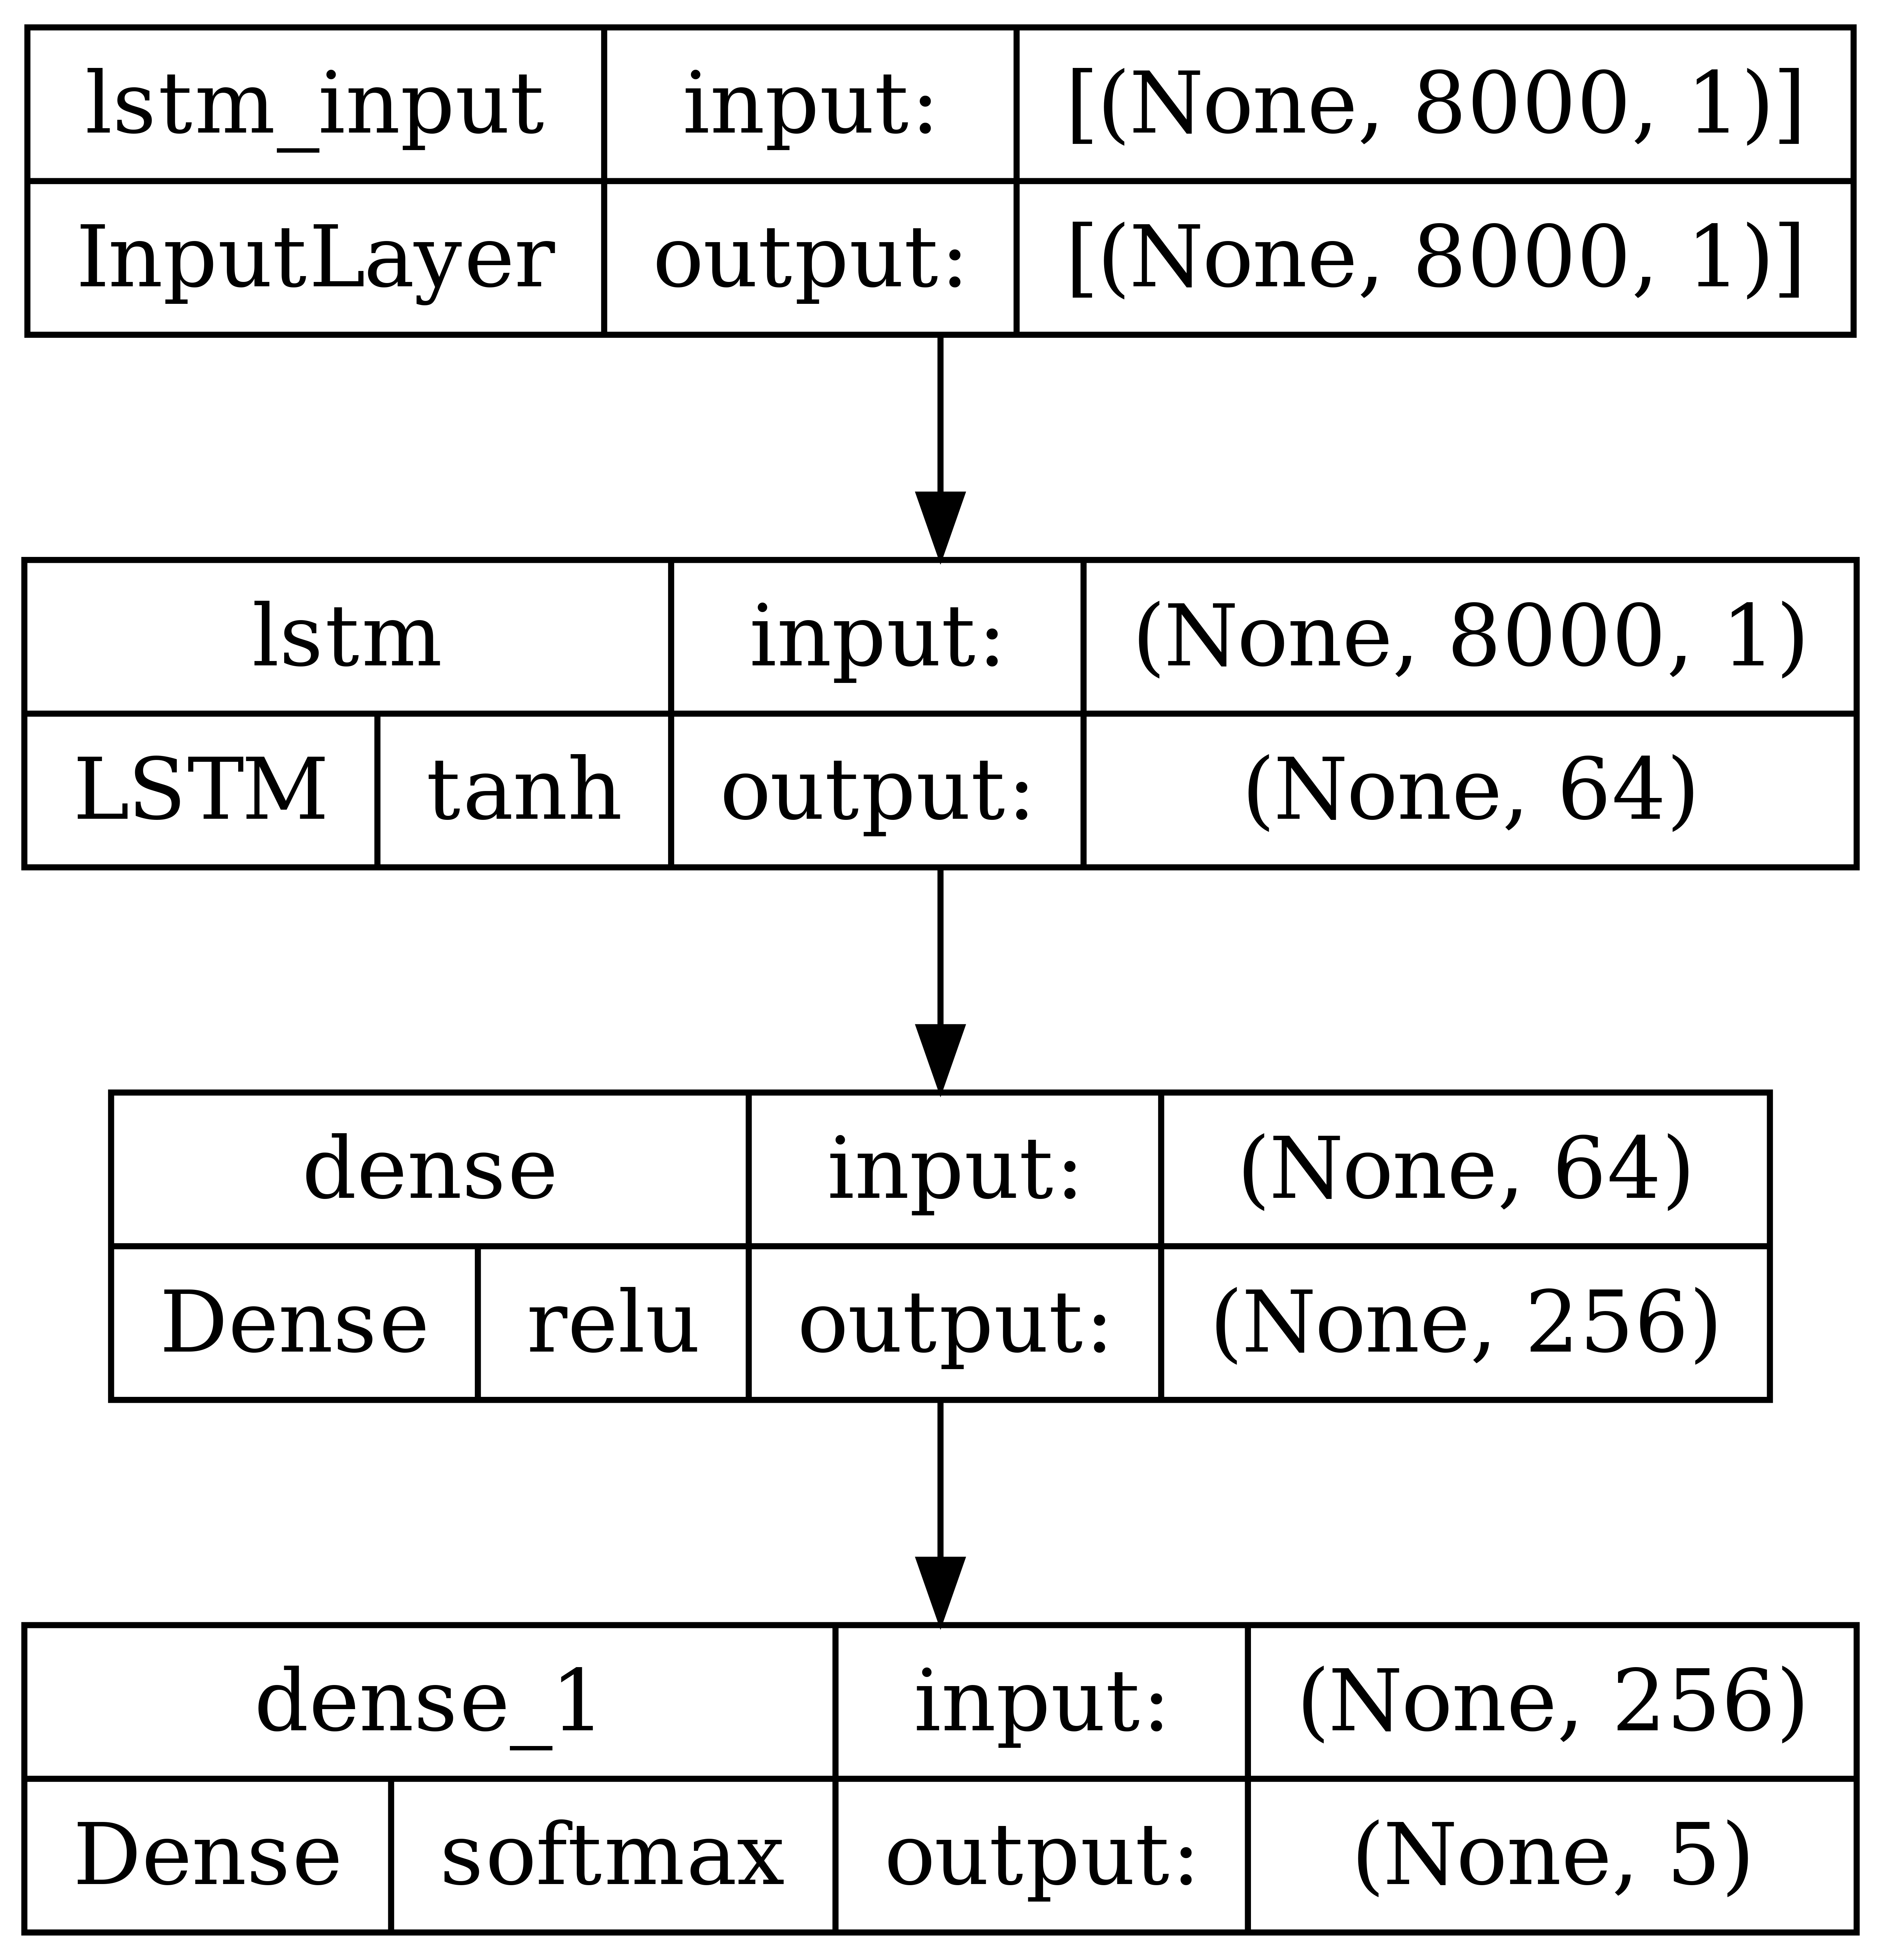

In [1]:
import tensorflow as tf
import numpy as np

# Generate synthetic training data
num_samples = 1000
input_shape = (8000,1)
num_classes = 5

# Generate random input data
x_train = np.random.rand(num_samples, *input_shape)
# Generate random target labels
y_train = np.random.randint(num_classes, size=num_samples)

# Convert target labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)

# Define the LSTM-based model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=input_shape),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 10

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

# Plot the model
tf.keras.utils.plot_model(
    model,
    to_file="LSTM01.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=1200,
    layer_range=None,
    show_layer_activations=True,
    show_trainable=False,
)

# How to load the wav file

In [4]:
import glob
import librosa
# ilbrosa: for basically everything about signal

data1 = []
labels1 = []
meta1=[]

aorticstenosis = glob.glob('/kaggle/input/15sdataforheartsound/aorticstenosis/*.wav')
mitral_regurgitation = glob.glob('/kaggle/input/15sdataforheartsound/mitral regurgitation/*.wav')
mitral_stenosis = glob.glob('/kaggle/input/15sdataforheartsound/mitral stenosis/*.wav')
mitral_valve_prolapse = glob.glob('/kaggle/input/15sdataforheartsound/mitral valve prolapse/*.wav')
normal = glob.glob('/kaggle/input/15sdataforheartsound/normal/*.wav')

SAMPLE_RATE=1000


for file_path in aorticstenosis:   
    #print(file_path)
    signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
    signal=np.array(signal)
    data1.append(signal)
    labels1.append(0)

for file_path in mitral_regurgitation:   
   # print(file_path)
    signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
    signal=np.array(signal)
    data1.append(signal)
    labels1.append(1)
    
for file_path in mitral_stenosis:   
   # print(file_path)
    signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
    signal=np.array(signal)
    data1.append(signal)
    labels1.append(2)
    
for file_path in mitral_valve_prolapse:
   # print(file_path)
    signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
    signal=np.array(signal)
    data1.append(signal)
    labels1.append(3)
    
for file_path in normal:   
   # print(file_path)
    signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
    signal=np.array(signal)
    data1.append(signal)
    labels1.append(4)

In [5]:
X= np.array(data1)
y= np.array(labels1)

In [6]:
X.shape

(1000, 1125)

In [7]:
y.shape

(1000,)

In [9]:
import tensorflow as tf
import numpy as np

# Generate synthetic training data
num_samples = 1000
input_shape = (1125,1)
num_classes = 5


X_train=X
# Convert target labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y, num_classes)

# Define the LSTM-based model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=input_shape),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
batch_size = 64
epochs = 20

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

Epoch 1/20
16/16 [==============================] - 3s 42ms/step - loss: 1.6081 - accuracy: 0.2100
Epoch 2/20
16/16 [==============================] - 1s 40ms/step - loss: 1.6018 - accuracy: 0.2960
Epoch 3/20
16/16 [==============================] - 1s 40ms/step - loss: 1.5911 - accuracy: 0.3010
Epoch 4/20
16/16 [==============================] - 1s 40ms/step - loss: 1.5705 - accuracy: 0.2950
Epoch 5/20
16/16 [==============================] - 1s 40ms/step - loss: 1.5415 - accuracy: 0.3260
Epoch 6/20
16/16 [==============================] - 1s 40ms/step - loss: 1.5032 - accuracy: 0.3290
Epoch 7/20
16/16 [==============================] - 1s 40ms/step - loss: 1.4641 - accuracy: 0.3810
Epoch 8/20
16/16 [==============================] - 1s 40ms/step - loss: 1.4290 - accuracy: 0.3780
Epoch 9/20
16/16 [==============================] - 1s 40ms/step - loss: 1.4040 - accuracy: 0.3940
Epoch 10/20
16/16 [==============================] - 1s 40ms/step - loss: 1.3843 - accuracy: 0.4030
Epoch 11/

NameError: name 'X_test' is not defined

# Implement all the steps 